In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from numpy import dot
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot 
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter

In [2]:
# split into features and labels
data = np.loadtxt("data2ClassHastie.txt")
X, y = data[:, :2], data[:, 2]

Max_K = 10
One = X[y == 1]
Zero = X[y == 0]

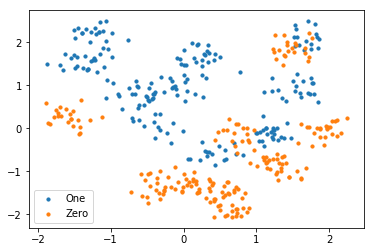

In [3]:
# plots
plt.scatter(One[:, 0], One[:, 1], s=10, label='One')
plt.scatter(Zero[:, 0], Zero[:, 1], s=10, label='Zero')
plt.legend()
plt.show()

In [4]:
def Distances(X,X_Pred):
    Dist = []
    for x in X:     
        temp = euclidean_distances([x],[X_Pred])[0][0]
        Dist.append(temp)
    return Dist

In [5]:
def FindKNN(X,X_pred,K):
    EuclideanDist = Distances(X,X_pred)
    K_indeces = np.argsort(EuclideanDist)[:K]
    return K_indeces

In [6]:
def predict(X,y,X_pred,K):
    K_indeces = FindKNN(X,X_pred,K)
    K_neigbours_X = X[K_indeces]
    K_neigbours_Y = y[K_indeces]
    #Pred_op = np.mean(K_neigbours_Y)
    vote_count = Counter(K_neigbours_Y)
    vote_count = vote_count.most_common(1)[0][0]
    
    return vote_count

In [7]:
def ComputeLoss(X,y,K):
    Pred_Y = []
    for x in X:
        Pred_Y.append(predict(X,y,x,K))
    Loss = np.sum(np.square(y - Pred_Y))
    return Pred_Y,Loss
    

K :  1   Loss :  0.0   Accuracy :  1.0
K :  2   Loss :  0.0   Accuracy :  1.0
K :  3   Loss :  0.0225   Accuracy :  0.9775
K :  4   Loss :  0.0075   Accuracy :  0.9925
K :  5   Loss :  0.0275   Accuracy :  0.9725
K :  6   Loss :  0.0225   Accuracy :  0.9775
K :  7   Loss :  0.025   Accuracy :  0.975
K :  8   Loss :  0.0175   Accuracy :  0.9825
K :  9   Loss :  0.0325   Accuracy :  0.9675


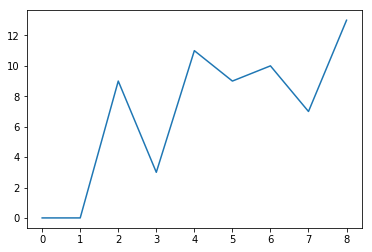

In [8]:
SquaredLoss = []
for k in range(1,Max_K):
    Pred_Y,Loss = ComputeLoss(X,y,k)
    SquaredLoss.append(Loss)
    print("K : ", k," " ,"Loss : " , SquaredLoss[k-1]/400," " , "Accuracy : ", (1-(SquaredLoss[k-1]/400)))


plt.plot(range(0,Max_K-1),SquaredLoss)

In [9]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [10]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

X_temp = np.c_[xx.ravel(), yy.ravel()]

y_grid = []
for i in X_temp:
    y_grid.append(predict(X,y,i,5))
    
y_grid = np.array(y_grid).reshape(xx.shape)


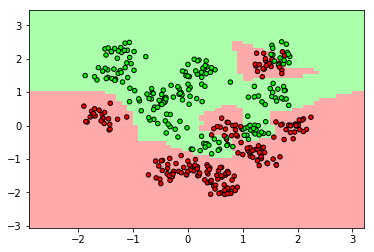

In [11]:
plt.figure()

plt.pcolormesh(xx, yy, y_grid, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [12]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [13]:
# create model
model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.fit(X, y, epochs=30,batch_size=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
400/400 [==============================] - 3s 7ms/step - loss: 0.6809 - acc: 0.5775
Epoch 2/30
400/400 [==============================] - 0s 30us/step - loss: 0.5871 - acc: 0.7575
Epoch 3/30
400/400 [==============================] - 0s 40us/step - loss: 0.5165 - acc: 0.7800
Epoch 4/30
400/400 [==============================] - 0s 40us/step - loss: 0.4692 - acc: 0.7925
Epoch 5/30
400/400 [==============================] - 0s 40us/step - loss: 0.4352 - acc: 0.8050
Epoch 6/30
400/400 [==============================] - 0s 40us/step - loss: 0.4150 - acc: 0.8150
Epoch 7/30
400/400 [==============================] - 0s 40us/step - loss: 0.3990 - acc: 0.8150
Epoch 8/30
400/400 [==============================] - 0s 40us/step - loss: 0.3865 - acc: 0.8175
Epoch 9/30
400/400 [==============================] - 0s 40us/step - loss: 0.3744 - acc: 0.8200
Epoch 10/30
400/400 [==============================] - 0s 40us/step - loss: 0.3640 - acc:

In [15]:
predictions = model.predict(X_temp)

In [16]:
y_grid = []

y_grid = np.array(predictions).reshape(xx.shape)

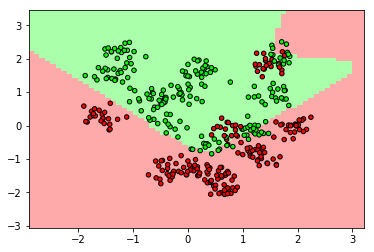

In [17]:
plt.figure()
plt.pcolormesh(xx, yy, y_grid, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()